In [1]:
Registration_Number = "22011103020"
Name = "Jayashre"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Jayashre and my roll no : 22011103020
Computer IP Address is: 172.28.0.12


In [13]:
from sklearn.datasets import fetch_openml


dataset = fetch_openml(name='boston', version=1)


print(dataset.keys())


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [18]:
print(dataset.data.head())

print("-----------------------------")

print(dataset.data.info())

print("-----------------------------")

print(dataset.data.describe())

print("-----------------------------")

print(dataset.data.columns)




      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float6

In [20]:
import pandas

X = dataset.data
y = dataset.target

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_s = scaler.transform(X)

# PCA Implementation using Covariance Method

In [21]:
import numpy as np

class MyPCA:

    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):

        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean) / self.scale


        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)


        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T

        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

        self.components = eig_vecs_sorted[:self.n_components,:]


        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]

        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)

        return X_proj

In [25]:
my_pca = MyPCA(n_components = 2).fit(X_s)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

X_proj = my_pca.transform(X_s)
print('Transformed data shape from scratch:', X_proj.shape)

Components:
 [[ 0.2509514  -0.25631454  0.34667207  0.00504243  0.34285231 -0.18924257
   0.3136706  -0.32154387  0.31979277  0.33846915  0.20494226 -0.20297261
   0.30975984]
 [-0.31525237 -0.3233129   0.11249291  0.45482914  0.21911553  0.14933154
   0.31197778 -0.34907    -0.27152094 -0.23945365 -0.30589695  0.23855944
  -0.07432203]]
Explained variance ratio from scratch:
 [0.47129606357274634, 0.11025193247588039]
Cumulative explained variance from scratch:
 [0.47129606 0.581548  ]
Transformed data shape from scratch: (506, 2)


# PCA Implementation Using Scikit Learn

Components:
 [[ 0.2509514  -0.25631454  0.34667207  0.00504243  0.34285231 -0.18924257
   0.3136706  -0.32154387  0.31979277  0.33846915  0.20494226 -0.20297261
   0.30975984]
 [-0.31525237 -0.3233129   0.11249291  0.45482914  0.21911553  0.14933154
   0.31197778 -0.34907    -0.27152094 -0.23945365 -0.30589695  0.23855944
  -0.07432203]
 [ 0.24656649  0.29585782 -0.01594592  0.28978082  0.12096411  0.59396117
  -0.01767481 -0.04973627  0.28725483  0.22074447 -0.32344627 -0.3001459
  -0.26700025]
 [ 0.06177071  0.12871159  0.01714571  0.81594136 -0.12822614 -0.28059184
  -0.17520603  0.21543585  0.13234996  0.10333509  0.28262198  0.1684985
   0.06941441]
 [ 0.08215692  0.32061699 -0.00781119  0.08653094  0.13685356 -0.4234472
   0.01669085  0.09859225 -0.20413162 -0.13046057 -0.58400223 -0.34560695
   0.39456113]
 [-0.21965961 -0.3233881  -0.0761379   0.16749014 -0.15298267  0.05926707
  -0.07170914  0.02343872 -0.14319401 -0.19293428  0.2731533  -0.80345454
  -0.05321583]
 [ 0.7776072

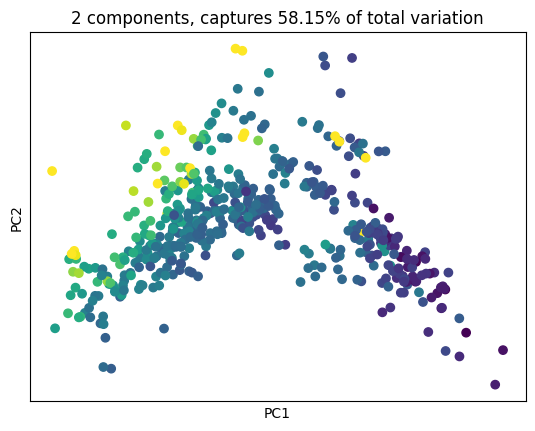

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 10, whiten = True)
pca.fit(X_s)
pca_X = pca.transform(X_s)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)


print('Transformed data shape:', pca_X.shape)

plt.scatter(pca_X[:, 0], pca_X[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()